In [2]:
import numpy as np 
import pandas as pd 
import os

In [13]:
%pip install utils

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13928 sha256=9cba8c251d3b776773604d491537783269e4b2f9bfb8dd9b132e365c71acb320
  Stored in directory: /Users/rahul/Library/Caches/pip/wheels/4c/a5/a3/ab48e06c936b39960801612ee2767ff53764119f33d3d646e7
Successfully built utils
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re

directory = '/Users/rahul/Downloads/archive'  # Replace with the path to your directory

data_headmic = []  # List to store the data recorded by head microphones
data_arraymic = []  # List to store the data recorded by array microphones

# Regular expression patterns
pattern_male_with_dysarthria = r'M0'
pattern_male_without_dysarthria = r'MC0'
pattern_female_with_dysarthria = r'F0'
pattern_female_without_dysarthria = r'FC0'
pattern_arrayMic = r'arrayMic'
pattern_headMic = r'headMic'

# Iterate over the files in the directory and its subfolders
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.wav'):
            filepath = os.path.join(root, filename)
            
            # Extract information from the filename using regular expressions
            is_male_with_dysarthria = bool(re.search(pattern_male_with_dysarthria, filename))
            is_male_without_dysarthria = bool(re.search(pattern_male_without_dysarthria, filename))
            is_female_with_dysarthria = bool(re.search(pattern_female_with_dysarthria, filename))
            is_female_without_dysarthria = bool(re.search(pattern_female_without_dysarthria, filename))
            is_arraymic = bool(re.search(pattern_arrayMic, filename))
            is_headmic = bool(re.search(pattern_headMic, filename))
            
            # Check microphone type and append the data to the corresponding list
            if is_arraymic:
                data_arraymic.append(['male' if is_male_with_dysarthria or is_male_without_dysarthria else 'female',
                                      'with_dysarthria' if is_male_with_dysarthria or is_female_with_dysarthria else 'without_dysarthria',
                                      filepath])
            elif is_headmic:
                data_headmic.append(['male' if is_male_with_dysarthria or is_male_without_dysarthria else 'female',
                                     'with_dysarthria' if is_male_with_dysarthria or is_female_with_dysarthria else 'without_dysarthria',
                                     filepath])

# Create separate DataFrames for head microphone and array microphone data
df_headmic = pd.DataFrame(data_headmic, columns=['gender', 'condition', 'filepath'])

In [4]:
import os
import shutil
import random

# Path to your full TORGO dataset
source_folder = directory  # 👈 Replace with actual path
destination_folder = "/Users/rahul/Downloads/test_inputs"

# Make sure destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Collect all .wav files recursively
wav_files = []
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.endswith(".wav"):
            wav_files.append(os.path.join(root, file))

# Randomly select N samples for testing
N = 10
selected_files = random.sample(wav_files, min(N, len(wav_files)))

# Copy to destination folder
for i, file_path in enumerate(selected_files):
    filename = f"test_{i+1}.wav"
    shutil.copy(file_path, os.path.join(destination_folder, filename))

print(f"✅ Copied {len(selected_files)} files to `{destination_folder}`")

✅ Copied 10 files to `/Users/rahul/Downloads/test_inputs`


In [4]:
%pip install tensorflow
%pip install matplotlib
%pip install seaborn
%pip install librosa
%pip install sklearn
%pip install IPython.display
%pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Reshape, LSTM, Dropout)
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
import seaborn as sns
import librosa
import librosa.display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.preprocessing import minmax_scale

import IPython.display as ipd
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

/Users/rahul/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
data=df_headmic
data.head(10)

,gender,condition,filepath
0,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
1,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
2,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
3,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
4,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
5,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
6,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
7,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
8,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...
9,female,with_dysarthria,/Users/rahul/Downloads/archive/F_Dys/wav_headM...


**You can play any of the audio files, like so**

In [8]:
i=6000  #Index of audio sample
ipd.Audio(data.iloc[i].filepath)

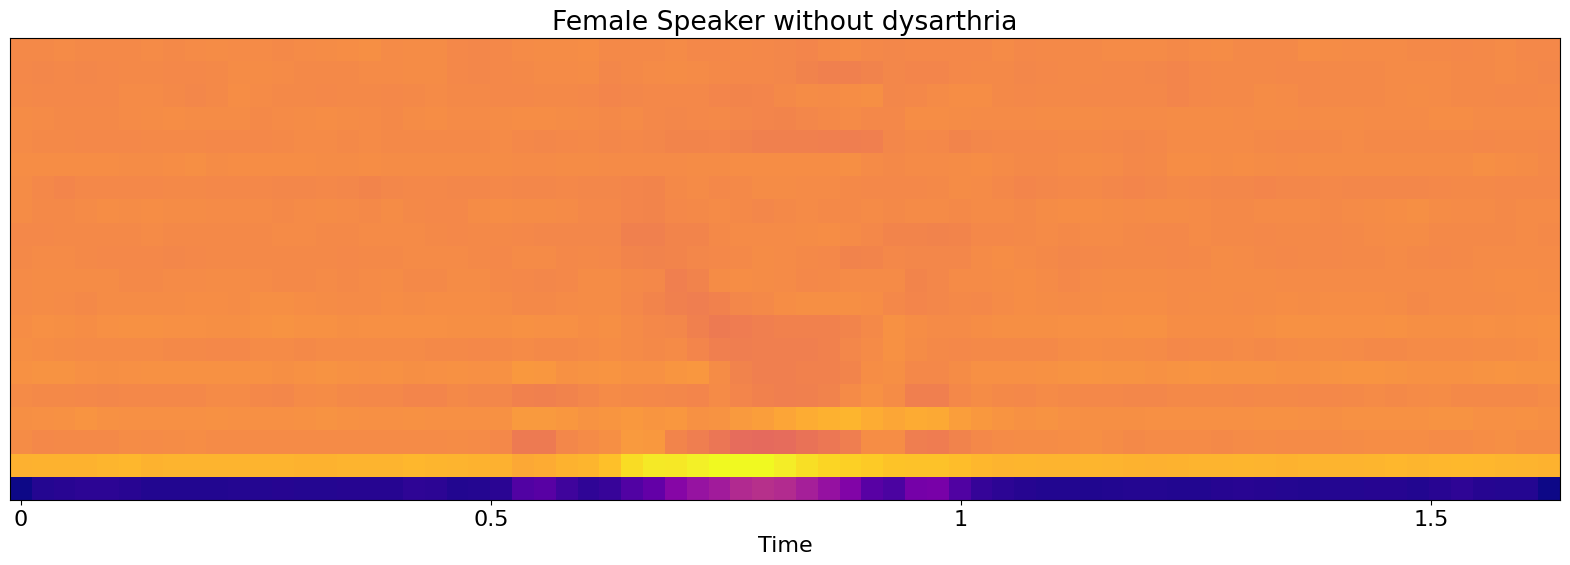

In [9]:
plt.figure(figsize=(20, 6))
plt.title('Female Speaker without dysarthria')
x , sr = librosa.load(data.iloc[6000].filepath)
mfccs = librosa.feature.mfcc(y=x, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap='plasma')
plt.show()

In [10]:
ipd.Audio(data.iloc[6000].filepath)

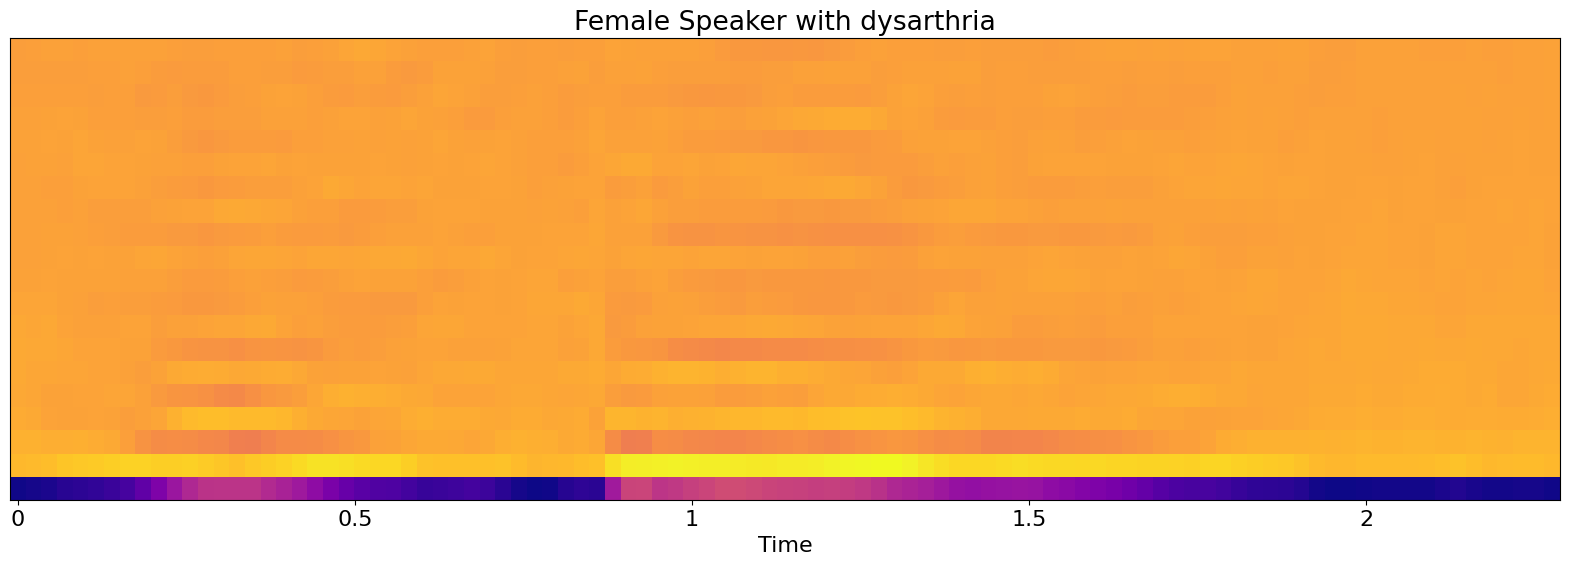

In [11]:
plt.figure(figsize=(20, 6))
plt.title('Female Speaker with dysarthria')
x , sr = librosa.load(data.iloc[8010].filepath)
mfccs = librosa.feature.mfcc(y=x, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap='plasma')
plt.show()

In [12]:
ipd.Audio(data.iloc[8010].filepath)

In [13]:
MFCCs = []

for i,file in tqdm(data.iterrows(),total=data.shape[0]):
    try:
        x , sr = librosa.load(file['filepath'])
        mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128),axis=1)
        MFCCs.append(mean_mfcc)
    except EOFError:
        pass

df_mfcc = pd.DataFrame(MFCCs)
df_mfcc['class'] = data['condition']
df_mfcc.info()

100%|██████████| 8218/8218 [00:26<00:00, 311.96it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Columns: 129 entries, 0 to class
dtypes: float32(128), object(1)
memory usage: 4.1+ MB


In [27]:
df_mfcc['class'].value_counts(normalize=True) #Checking the distribution of labels. 

class
0.0    0.635346
1.0    0.364654
Name: proportion, dtype: float64

In [28]:
df_mfcc.isna().sum().sum() #Checking for null values

np.int64(0)

**Preparing Data for Modelling**

In [29]:
df_mfcc.loc[df_mfcc['class']=='without_dysarthria','class'] = 0.0
df_mfcc.loc[df_mfcc['class']=='with_dysarthria','class'] = 1.0
df_mfcc['class'] = df_mfcc['class'].astype(float)

X = df_mfcc.iloc[:,:-1].values
y = df_mfcc.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)

In [78]:
df_mfcc['class'].value_counts()

class
0.0    5220
1.0    2996
Name: count, dtype: int64

In [30]:

# Define the CNN + LSTM model
model = Sequential([
    InputLayer(input_shape=(16, 8, 1)),  # (Height, Width, Channels)

    # CNN feature extraction
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and reshape for LSTM input
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Optional, helps prevent overfitting
    Reshape((4, 32)),  # Reshape to (timesteps, features)

    # LSTM layer
    LSTM(64, return_sequences=False),
    Dropout(0.3),  # Optional for LSTM output regularization

    # Output layer
    Dense(1, activation='sigmoid')
])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 16, 8, 64)      │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,593 (900.75 KB)

 Trainable params: 230,593 (900.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=25, 
    validation_data=(X_test, y_test), 
    verbose=1  # Change to 0 to silence output
)

model.save('model/model.h5')

Epoch 1/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7446 - loss: 0.5219 - val_accuracy: 0.9203 - val_loss: 0.2100
Epoch 2/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9411 - loss: 0.1702 - val_accuracy: 0.9732 - val_loss: 0.0740
Epoch 3/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9789 - loss: 0.0715 - val_accuracy: 0.9842 - val_loss: 0.0405
Epoch 4/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9849 - loss: 0.0510 - val_accuracy: 0.9860 - val_loss: 0.0435
Epoch 5/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9855 - loss: 0.0432 - val_accuracy: 0.9964 - val_loss: 0.0166
Epoch 6/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9885 - loss: 0.0357 - val_accuracy: 0.9957 - val_loss: 0.0155
Epoch 7/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9827 - loss: 0.0477 - val_accuracy: 0.9884 - val_loss: 0.0276
Epoch 8/25
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9945 - loss: 0.0183 - val_accuracy: 0.

# Model Evaluation

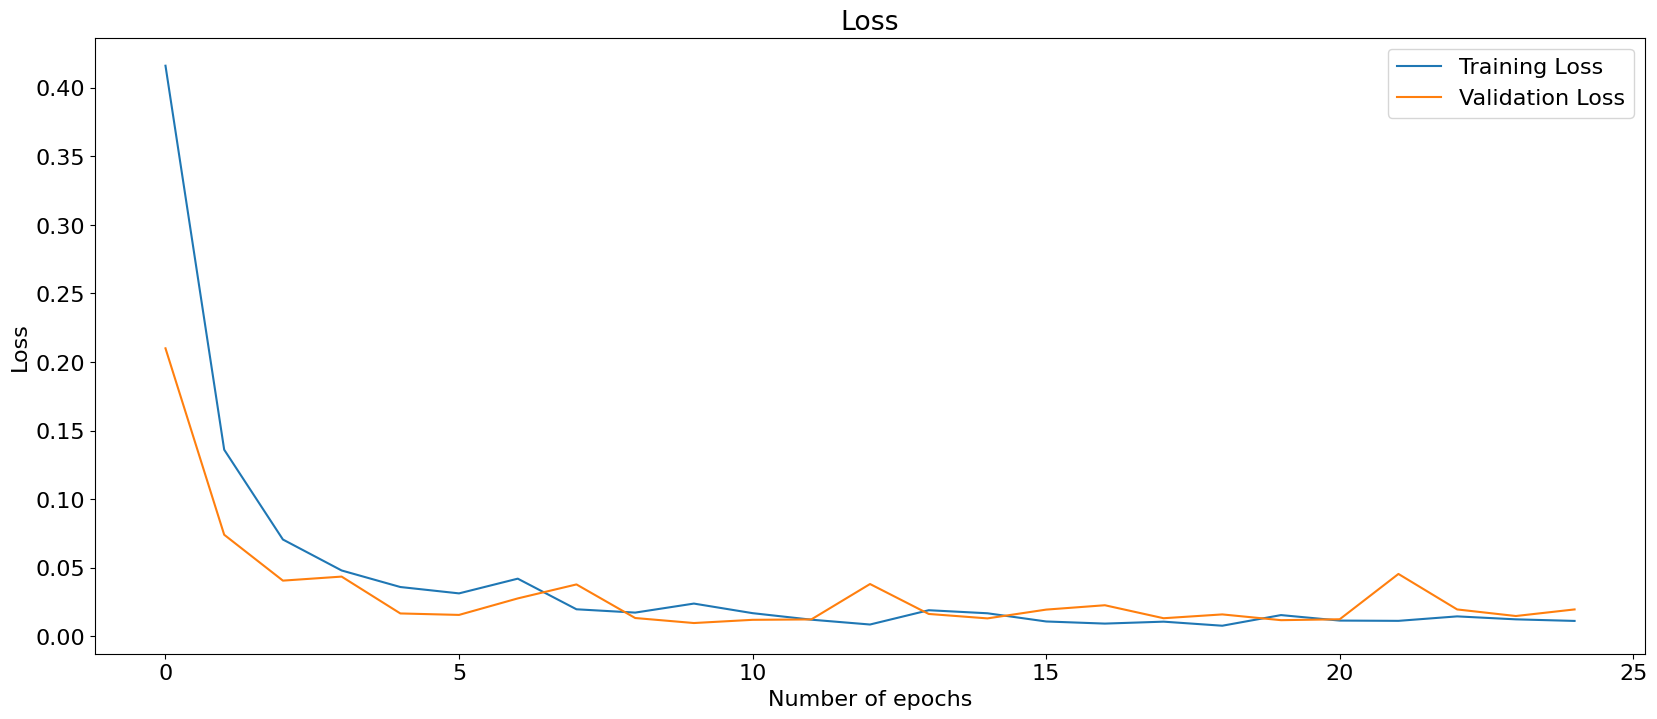

In [32]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

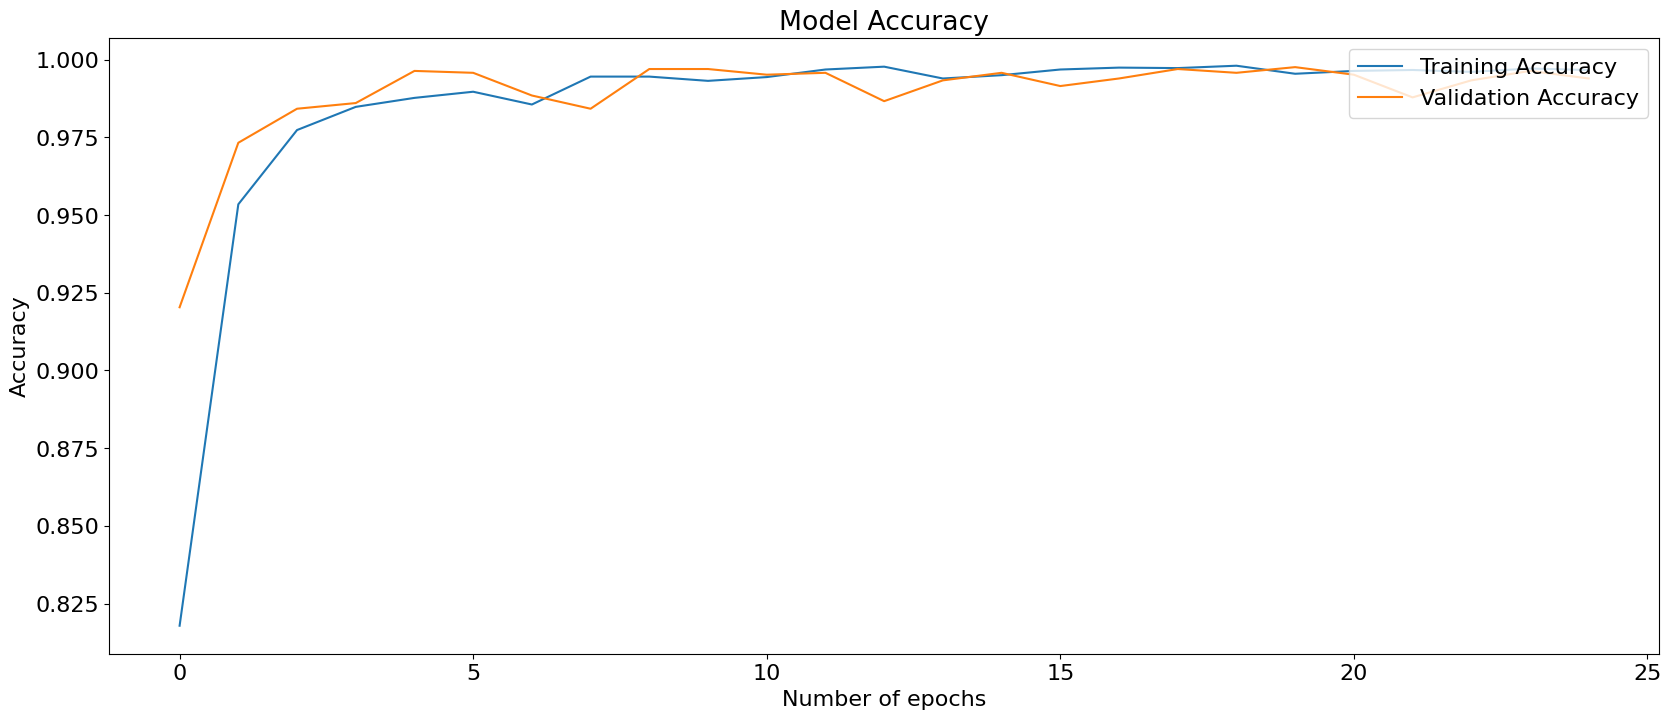

In [33]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


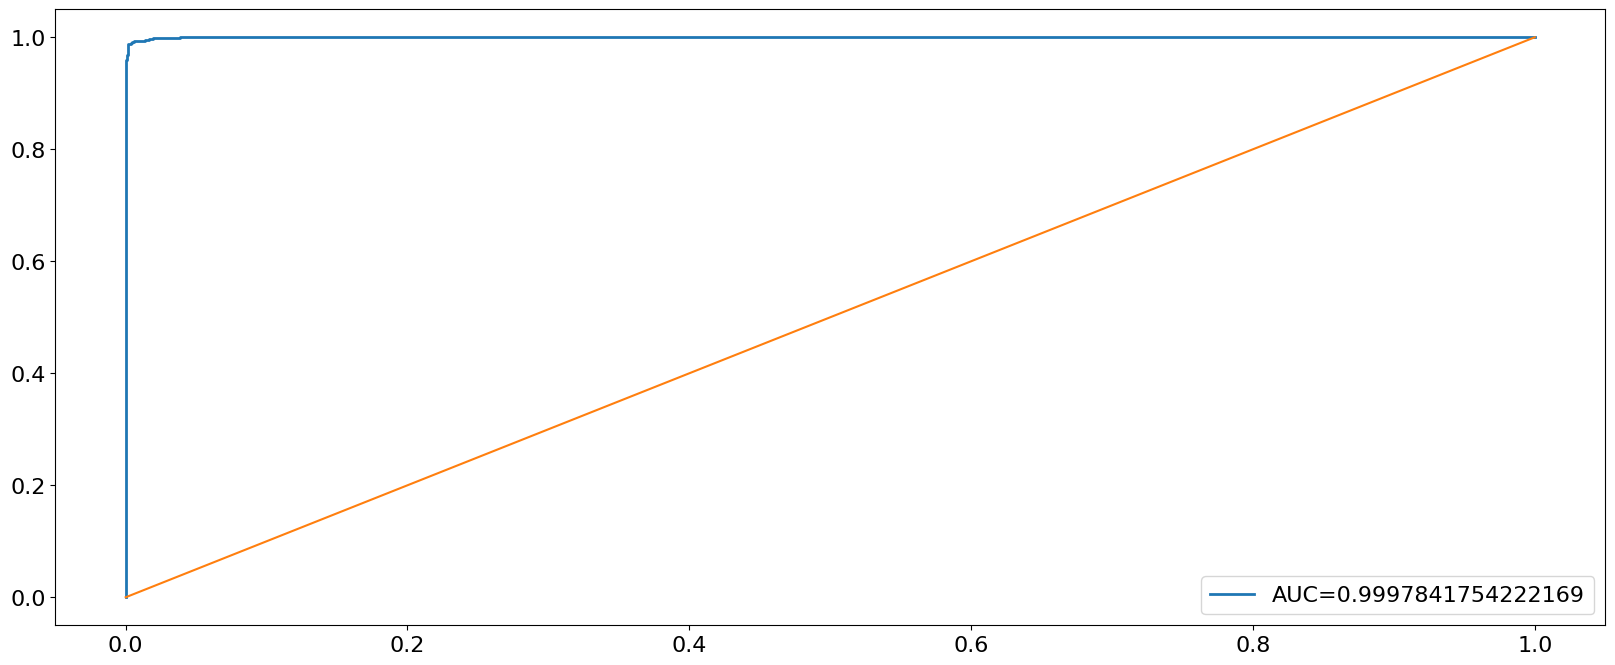

In [34]:
y_pred = model.predict(X_test)

plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc),lw=2)
plt.plot([0, 1], [0, 1])
plt.legend(loc='lower right')
plt.show()

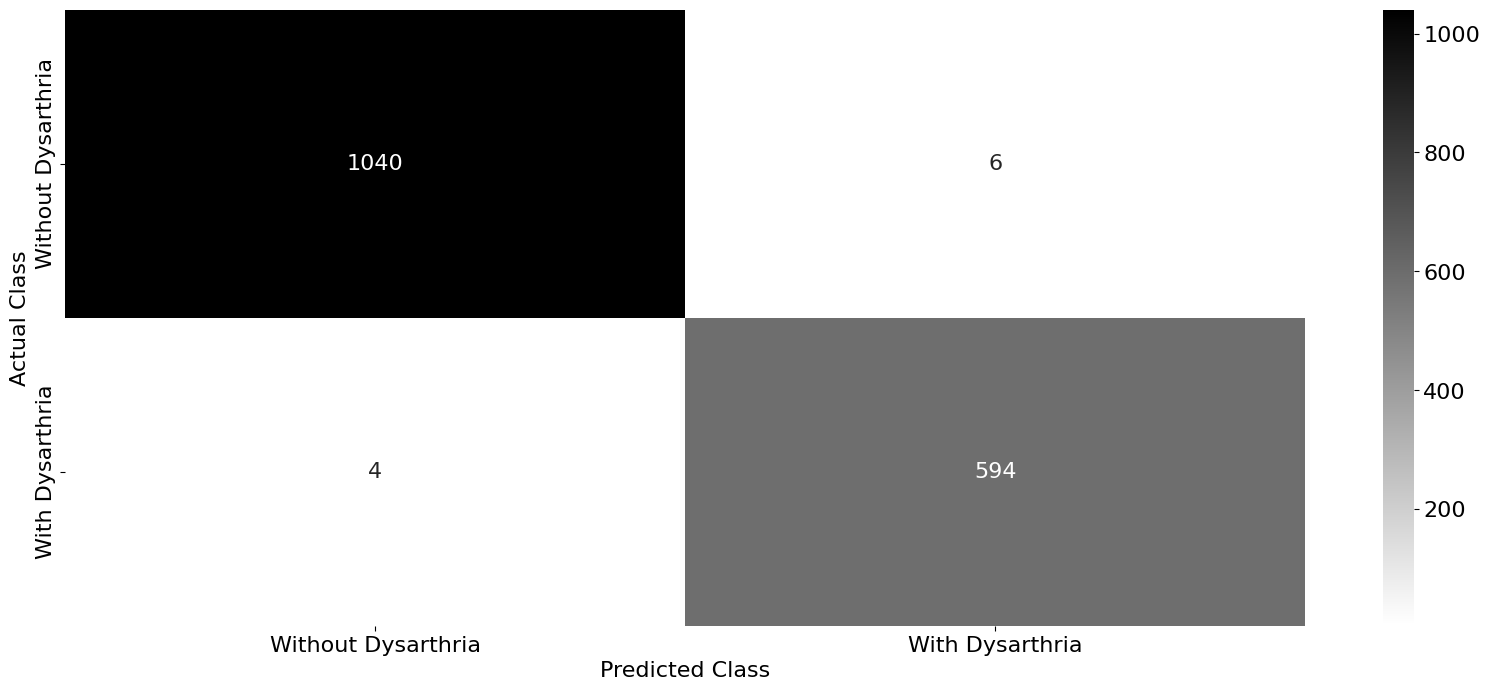

In [35]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='.4g',cmap='binary',xticklabels=['Without Dysarthria','With Dysarthria'],yticklabels=['Without Dysarthria','With Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1010
         1.0       0.99      0.98      0.98       634

    accuracy                           0.99      1644
   macro avg       0.99      0.99      0.99      1644
weighted avg       0.99      0.99      0.99      1644



In [36]:
recall_score(y_test,y_pred)

0.9933110367892977

In [38]:
import pickle

# Save the trained model and scaler/preprocessor
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [87]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('model/model.h5')

# Function to extract MFCC features from an audio file
def extract_features(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs with the desired number of coefficients
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=128)
    
    # Normalize or reshape MFCCs as needed
    mfccs = np.mean(mfccs.T, axis=0)  # Optionally reduce dimensions (mean across time frames)

    # Check the shape of the MFCCs
    print(f"MFCC shape before reshaping: {mfccs.shape}")

    # If needed, reshape MFCCs to match (16, 8, 1)
    # Reshaping the extracted MFCCs to the required (16, 8, 1) shape
    mfccs_reshaped = mfccs[:128].reshape(1, 16, 8, 1)  # Adjust size if needed

    # Check the shape after reshaping
    print(f"MFCC shape after reshaping: {mfccs_reshaped.shape}")

    return mfccs_reshaped

# Function to make predictions based on the input audio
# Example of applying a custom threshold
def predict_with_threshold(file_path, threshold=0.7):
    features = extract_features(file_path)
    
    # Get prediction probabilities
    prediction = model.predict(features)
    
    # Print raw prediction for inspection
    print(f'Raw Prediction: {prediction}')
    
    # Apply custom threshold
    predicted_class = 'Control' if prediction[0][0] > threshold else 'Dysarthric'
    
    print(f'Predicted Class: {predicted_class}')
    print(f'Prediction Probability: {prediction[0][0]}')

# Example: Test with custom threshold
# Example: Replace with your audio file path
audio_file = '/Users/rahul/Downloads/test_inputs/test_8.wav'  # Replace with the actual file path

# Make prediction
prediction_probabilities = predict_with_threshold(audio_file,0.99)

# Output the prediction probabilities
print(f'Prediction probabilities: {prediction_probabilities}')


MFCC shape before reshaping: (128,)
MFCC shape after reshaping: (1, 16, 8, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Raw Prediction: [[0.99981886]]
Predicted Class: Control
Prediction Probability: 0.9998188614845276
Prediction probabilities: None
